In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

table = pd.read_csv('../train.csv') # https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
renaming = {
    'battery_power': 'Battery Capacity',
    'talk_time': 'Battery Life for Calls',
    'touch_screen': 'Touch Screen',
    'blue': 'Bluetooth',
    'wifi': 'Wifi',
    'dual_sim': 'Dual SIM',
    'four_g': '4G',
    'three_g': '3G',
    'n_cores': 'CPU Cores',
    'clock_speed': 'CPU Speed',
    'fc': 'Frontal Camera Mpx',
    'pc': 'Rear Camera Mpx',
    'int_memory': 'Storage',
    'ram': 'RAM',
    'm_dep': 'Depth',
    'mobile_wt': 'Weight',
    'px_height': 'Screen Height px',
    'px_width': 'Screen Width px',
    'sc_h': 'Screen Height cm',
    'sc_w': 'Screen Width cm',
    'price_range': 'Price Range'
}
df = pd.DataFrame(table)
df.rename(columns=renaming, inplace=True)

# Застосуйте методи зниження розмірності PCA і TSNE для візуалізації даних, знижуючи розмірність до двох

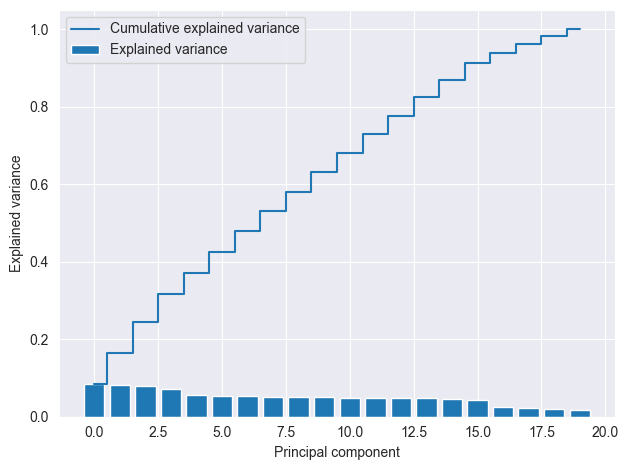

In [191]:
x = df.drop('Price Range', axis='columns')
y = df['Price Range']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

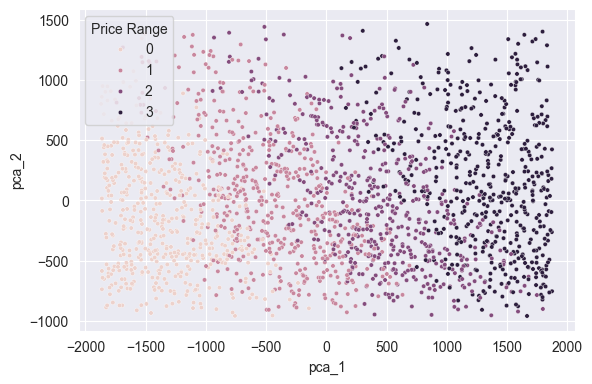

In [192]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'Price Range': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='Price Range', data=pca_result_df, ax=ax,s=10, legend="full")
ax.set_aspect('equal')

## tSNE

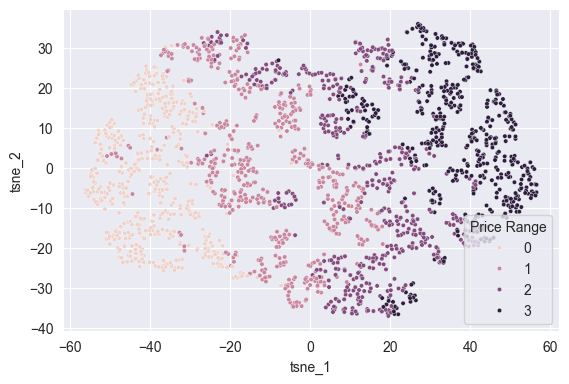

In [193]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(x)

fig, ax = plt.subplots(1)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'Price Range': y})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Price Range', data=tsne_result_df, ax=ax,s=10, legend="full")
ax.set_aspect('equal')

## За допомогою алгоритму k-means зробіть квантування зображення з глибиною 64,32,16 та 8 рівнів

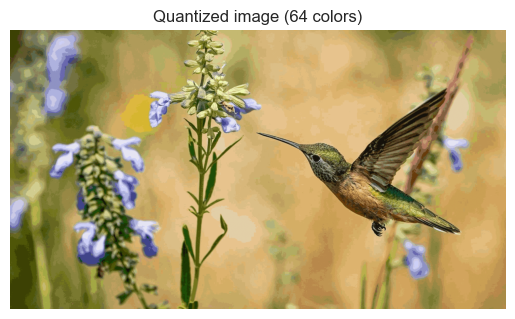

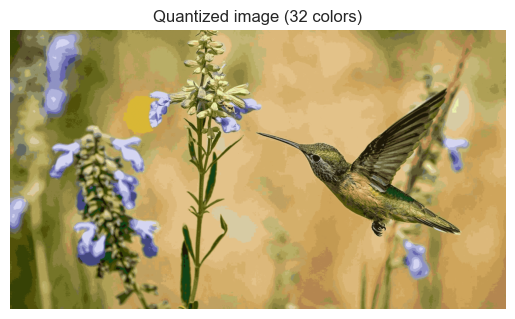

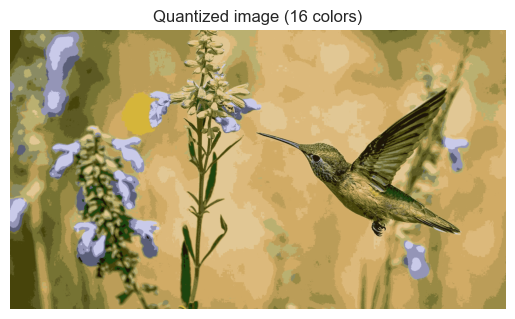

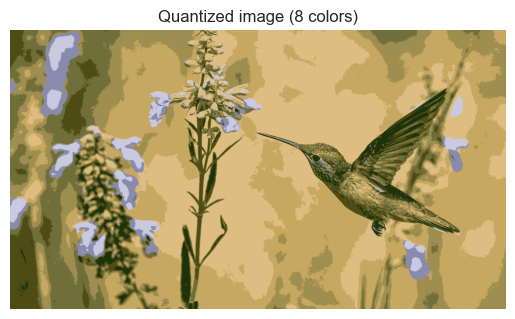

In [194]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

n_colors = [64, 32, 16, 8]
image = np.array(Image.open('th.jpg'), dtype=np.float64) / 255

w, h, d = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))

for i in range(len(n_colors)):
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors[i], random_state=0).fit(image_array_sample)
    label = kmeans.predict(image_array)
    plt.figure()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors[i]} colors)")
    plt.imshow(kmeans.cluster_centers_[label].reshape(w, h, -1))

# nlp

In [195]:
df = pd.DataFrame(pd.read_csv('gender_tweets.csv'))[['gender', 'text', 'gender_confidence']]

df.dropna(inplace=True, ignore_index=True)

df

,gender,text,gender_confidence
0,male,Robbie E Responds To Critics After Win Against...,1.0000
1,male,���It felt like they were my friends and I was...,1.0000
2,male,i absolutely adore when louis starts the songs...,0.6625
3,male,Hi @JordanSpieth - Looking at the url - do you...,1.0000
4,female,Watching Neighbours on Sky+ catching up with t...,1.0000
...,...,...,...
19948,female,"@lookupondeath ...Fine, and I'll drink tea too...",1.0000
19949,male,Greg Hardy you a good player and all but don't...,1.0000
19950,male,You can miss people and still never want to se...,1.0000
19951,female,@bitemyapp i had noticed your tendency to pee ...,0.8489


## Preprocessing

In [196]:
import re, string
import inflect

from nltk.corpus import stopwords

# Initialize inflect engine
p = inflect.engine()

# Function to convert ordinal string to words
def ordinal_to_words(ordinal_str):
    match = re.match(r"(\d+)(st|nd|rd|th)", ordinal_str)
    number = int(match.group(1))
    # Convert number to ordinal words
    return p.number_to_words(p.ordinal(number))


stopw = set(stopwords.words("english"))
stopw.update({"one", "time", "love", "u"})

def preprocess(transformer: str) -> str:
    transformer = transformer.lower()
    
    transformer = re.sub(r"https*\S+", " ", transformer)
    transformer = re.sub(r"^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-]+)(\.[a-zA-Z]{2,5}){1,2}$", " ", transformer)
    transformer = re.sub(r"@\S+", " ", transformer)
    transformer = re.sub(r"#\S+", " ", transformer)
    if re.match(r"(\d+)(st|nd|rd|th)", transformer):
        transformer = re.sub(r"(\d+)(st|nd|rd|th)", ordinal_to_words(transformer), transformer)
    transformer = re.sub(r"&amp;", " ", transformer)
    transformer = re.sub(r"&gt;", " ", transformer)
    transformer = re.sub(r"&lt;", " ", transformer)
    transformer = re.sub(r"-", " ", transformer)
    transformer = re.sub(r"\d", " ", transformer)
    transformer = re.sub(r"�۪", " ", transformer)
    transformer = re.sub(r"[٪ή]", " ", transformer)
    transformer = re.sub(r"ٍ", " ", transformer)
    transformer = re.sub(r"[�۝ُԍϭջωԏե]", " ", transformer)
    transformer = re.sub("[%s]" % re.escape(string.punctuation), " ", transformer)
    transformer = re.sub(r"\s{2,}", " ", transformer)
    transformer = ' '.join([word for word in transformer.split(' ') if word not in stopw])
    return transformer.strip()

df_copy = df.copy()

df_copy['text'] = df_copy['text'].apply(preprocess)

df

,gender,text,gender_confidence
0,male,Robbie E Responds To Critics After Win Against...,1.0000
1,male,���It felt like they were my friends and I was...,1.0000
2,male,i absolutely adore when louis starts the songs...,0.6625
3,male,Hi @JordanSpieth - Looking at the url - do you...,1.0000
4,female,Watching Neighbours on Sky+ catching up with t...,1.0000
...,...,...,...
19948,female,"@lookupondeath ...Fine, and I'll drink tea too...",1.0000
19949,male,Greg Hardy you a good player and all but don't...,1.0000
19950,male,You can miss people and still never want to se...,1.0000
19951,female,@bitemyapp i had noticed your tendency to pee ...,0.8489


## Візуалізація

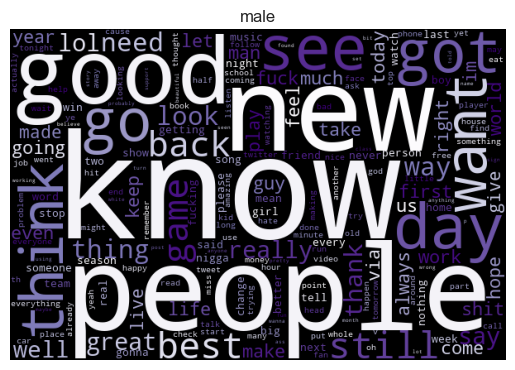

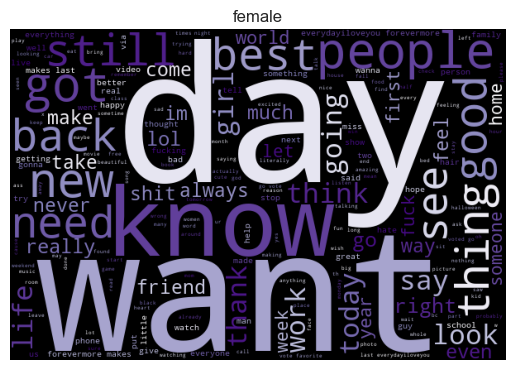

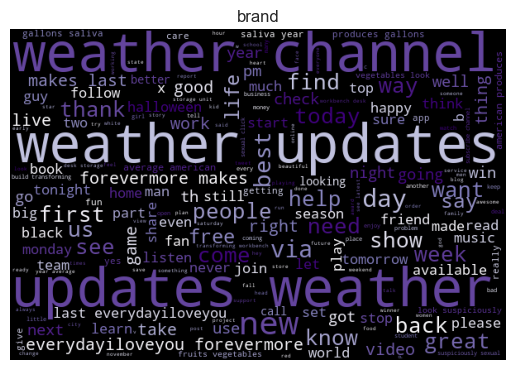

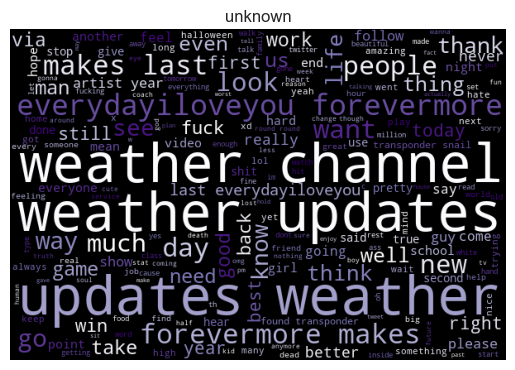

In [197]:
from wordcloud import WordCloud

for i in df_copy['gender'].unique():
    text = ''
    for tw in df_copy[df_copy['gender'] == i]['text']:
        text += tw + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="black", colormap='Purples_r').generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(i)
    plt.show()

## Векторизація та класифікація

C:\Users\kalle\AppData\Local\Temp\ipykernel_53580\2144650131.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'brand' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_vectors[df_vectors['gender'] == 'unknown'] = 'brand'


*Logistic Regression*

              precision    recall  f1-score   support

           0       0.59      0.49      0.54      1175
           1       0.45      0.57      0.50      1303
           2       0.43      0.38      0.40      1267
           3       1.00      1.00      1.00       246

    accuracy                           0.51      3991
   macro avg       0.62      0.61      0.61      3991
weighted avg       0.52      0.51      0.51      3991

[[575 336 264   0]
 [185 741 377   0]
 [207 581 479   0]
 [  0   0   0 246]]
*Multinomial Naive Bayes*

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1175
           1       0.44      0.66      0.52      1303
           2       0.42      0.37      0.39      1267
           3       0.99      1.00      1.00       246

    accuracy                           0.51      3991
   macro avg       0.63      0.60      0.60      3991
weighted avg       0.54      0.51      0.50      3991

[[4

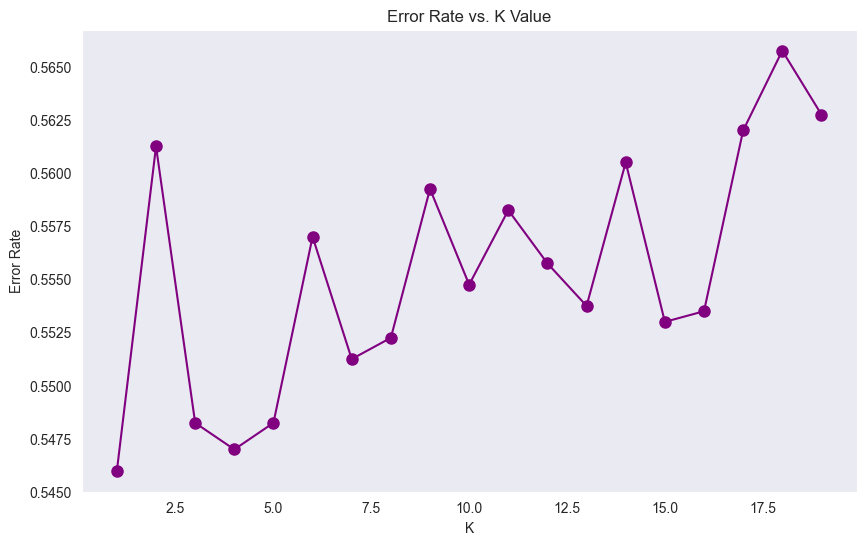

In [198]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

df_vectors = df_copy.copy()
df_vectors[df_vectors['gender'] == 'unknown'] = 'brand'
df_vectors['gender'] = LabelEncoder().fit_transform(df['gender'])

X = df_vectors['text']
y = df_vectors['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cv = CountVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_vectorised = tfidf.fit_transform(X_train)
X_test_vectorised =  tfidf.transform(X_test)

print('*Logistic Regression*\n')

logreg_model = LogisticRegression()
logreg_model.fit(X_train_vectorised, y_train)
y_pred = logreg_model.predict(X_test_vectorised)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('*Multinomial Naive Bayes*\n')

mnb_model = MultinomialNB()
mnb_model.fit(X_train_vectorised, y_train)
y_pred = mnb_model.predict(X_test_vectorised)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('*SVC*\n')

svc_model = SVC()
svc_model.fit(X_train_vectorised, y_train)
y_pred = svc_model.predict(X_test_vectorised)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('*Decision Tree*\n')

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_vectorised, y_train)
y_pred = tree_model.predict(X_test_vectorised)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_vectorised,y_train)
    pred_i = knn.predict(X_test_vectorised)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, marker='o', markersize=8, color='purple')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()